In [36]:
import xarray as xr
import os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from file_finder import  find_nc_file_paths

In [37]:
# 使用示例
directory = r"D:\swot\L4\science"
nc_files = find_nc_file_paths(directory)
# 打印前五个.nc文件路径，每个路径换行显示
for path in nc_files[:5]:
    print(path)

D:\swot\L4\science\dt_global_allsat_phy_l4_20230710_20240501.nc
D:\swot\L4\science\dt_global_allsat_phy_l4_20230711_20240501.nc
D:\swot\L4\science\dt_global_allsat_phy_l4_20230712_20240501.nc
D:\swot\L4\science\dt_global_allsat_phy_l4_20230713_20240501.nc
D:\swot\L4\science\dt_global_allsat_phy_l4_20230714_20240501.nc


In [3]:
data = xr.open_dataset(nc_files[0])

In [4]:
data_variable_names = list(data.variables.keys())
data_variable_names

['longitude',
 'latitude',
 'time',
 'sla',
 'ugosa',
 'vgosa',
 'relative_vorticity',
 'adt',
 'ugos',
 'vgos',
 'longitude_bounds',
 'latitude_bounds']

In [5]:
data.relative_vorticity

<xarray.DataArray 'relative_vorticity' (time: 1, latitude: 1701, longitude: 3600)> Size: 49MB
[6123600 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float64 29kB 0.0 0.1 0.2 0.3 ... 359.7 359.8 359.9
  * latitude   (latitude) float32 7kB -80.0 -79.9 -79.8 -79.7 ... 89.8 89.9 90.0
  * time       (time) datetime64[ns] 8B 2023-07-10

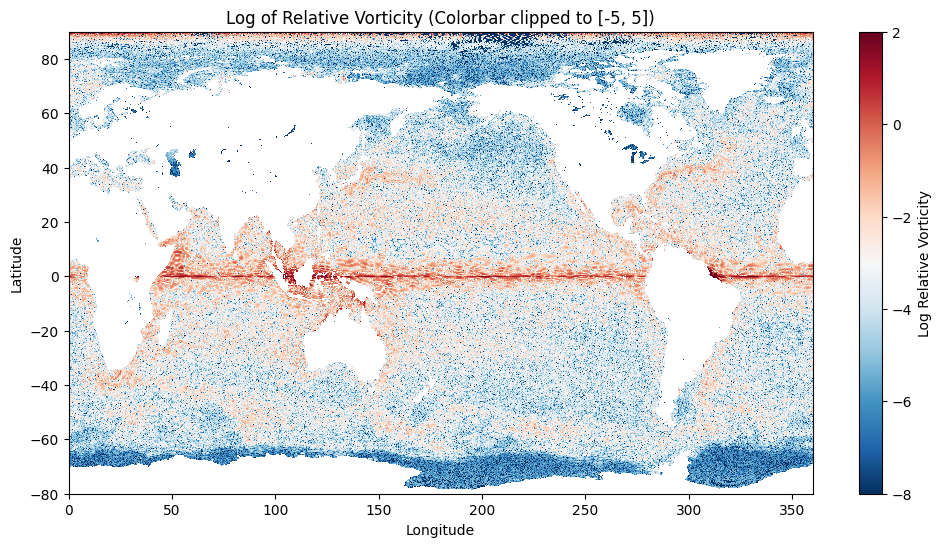

In [6]:
# 提取相对涡度数据
relative_vorticity = data['relative_vorticity']

# 进行对数处理，避免对数零值或负值的问题，添加一个小值（例如 1e-10）
log_relative_vorticity = np.log(np.abs(relative_vorticity) + 1e-10)

plt.figure(figsize=(12, 6))
plot = plt.pcolormesh(relative_vorticity['longitude'], relative_vorticity['latitude'], log_relative_vorticity[0, :, :], cmap='RdBu_r')
cbar = plt.colorbar(plot)
cbar.set_label('Log Relative Vorticity')

# 设置colorbar范围
# 设置colorbar范围
plot.set_clim(-8, 2)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Log of Relative Vorticity (Colorbar clipped to [-5, 5])')
plt.show()

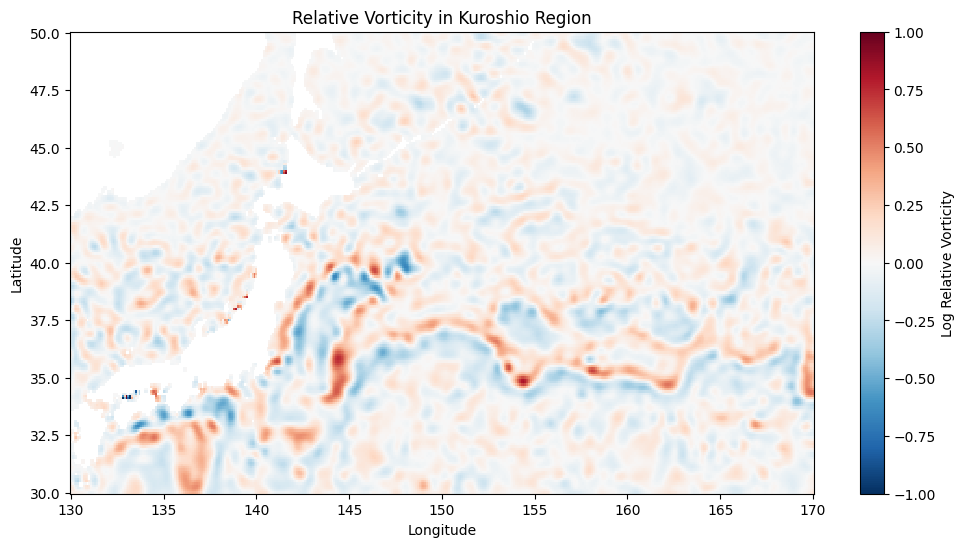

In [43]:
# 定义黑潮区域的经纬度边界
lon_min, lon_max = 130, 170  # 东经130°到170°
lat_min, lat_max = 30, 50    # 北纬30°到50°
vmin, vmax = -9, 2  # 颜色条范围

# 选择黑潮区域的数据
subset = relative_vorticity.sel(longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))

# 绘制黑潮区域相对涡度的对数值地图
plt.figure(figsize=(12, 6))
plot = plt.pcolormesh(subset['longitude'], subset['latitude'], subset[0, :, :], cmap='RdBu_r', vmin=-1, vmax=1)
cbar = plt.colorbar(plot)
cbar.set_label('Log Relative Vorticity')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Relative Vorticity in Kuroshio Region')
plt.show()

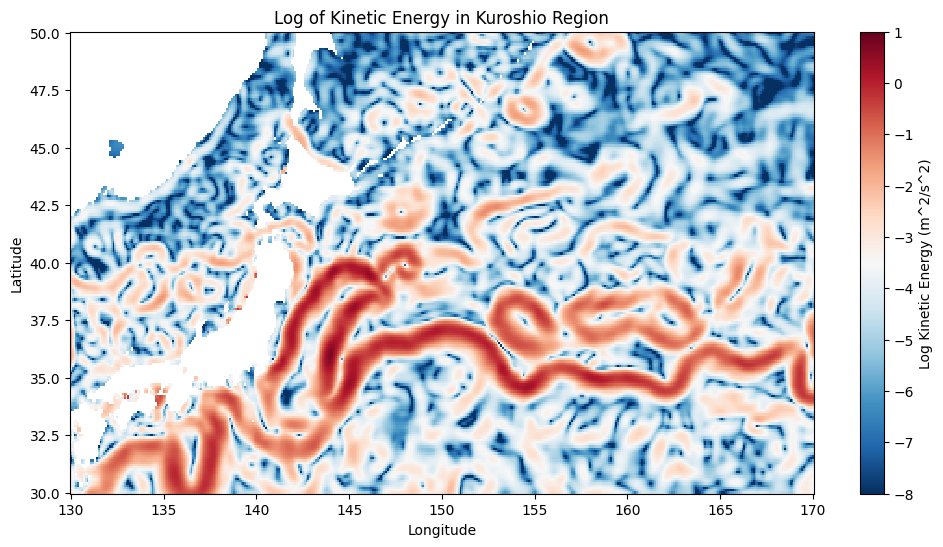

In [40]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# 读取NetCDF文件
# file_path = 'path_to_your_file.nc'
ds = data

# 提取速度分量数据
ugos = ds['ugos']
vgos = ds['vgos']

# 计算总速度
total_velocity = np.sqrt(ugos**2 + vgos**2)

# 定义黑潮区域的经纬度边界
lon_min, lon_max = 130, 170  # 东经130°到170°
lat_min, lat_max = 30, 50    # 北纬30°到50°

# 计算动能 (KE = 0.5 * (ugos^2 + vgos^2))
kinetic_energy = 0.5 * (ugos**2 + vgos**2)

# 对动能进行对数处理，避免对数零值或负值的问题，添加一个小值（例如 1e-10）
log_kinetic_energy = np.log(kinetic_energy + 1e-10)

# 选择黑潮区域的数据
subset_ke = log_kinetic_energy.sel(longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))

# 绘制黑潮区域动能地图
plt.figure(figsize=(12, 6))
plot = plt.pcolormesh(subset_ke['longitude'], subset_ke['latitude'], subset_ke[0, :, :], cmap='RdBu_r', vmin=-8, vmax=1)
cbar = plt.colorbar(plot)
cbar.set_label('Log Kinetic Energy (m^2/s^2)')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Log of Kinetic Energy in Kuroshio Region')
plt.show()

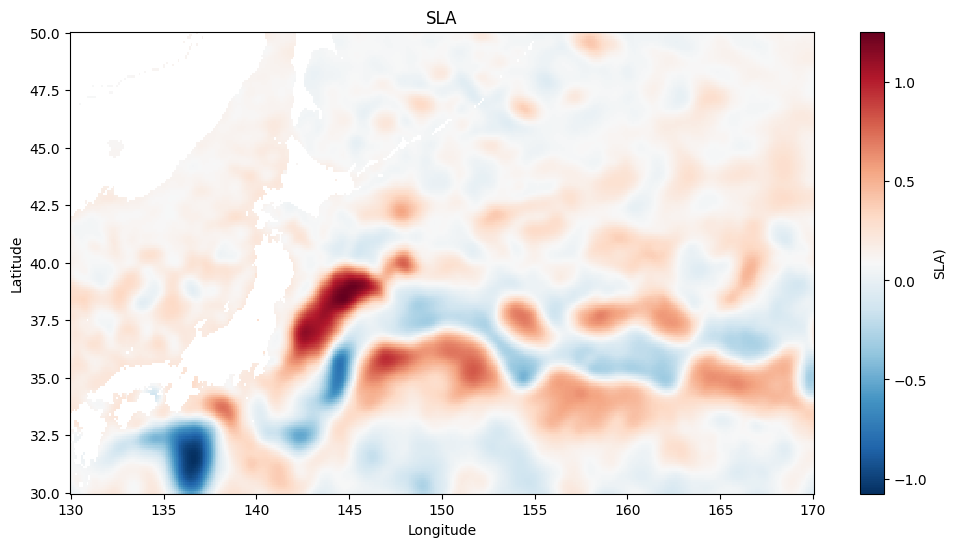

In [44]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# 读取NetCDF文件
# file_path = 'path_to_your_file.nc'
ds = data

# 提取速度分量数据

sla = ds['sla']

# 定义黑潮区域的经纬度边界
lon_min, lon_max = 130, 170  # 东经130°到170°
lat_min, lat_max = 30, 50    # 北纬30°到50°

# 选择黑潮区域的数据
subset_sla = sla.sel(longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))

# 绘制黑潮区域动能地图
plt.figure(figsize=(12, 6))
plot = plt.pcolormesh(subset_sla['longitude'], subset_sla['latitude'], subset_sla[0, :, :], cmap='RdBu_r')
cbar = plt.colorbar(plot)
cbar.set_label('SLA)')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('SLA')
plt.show()

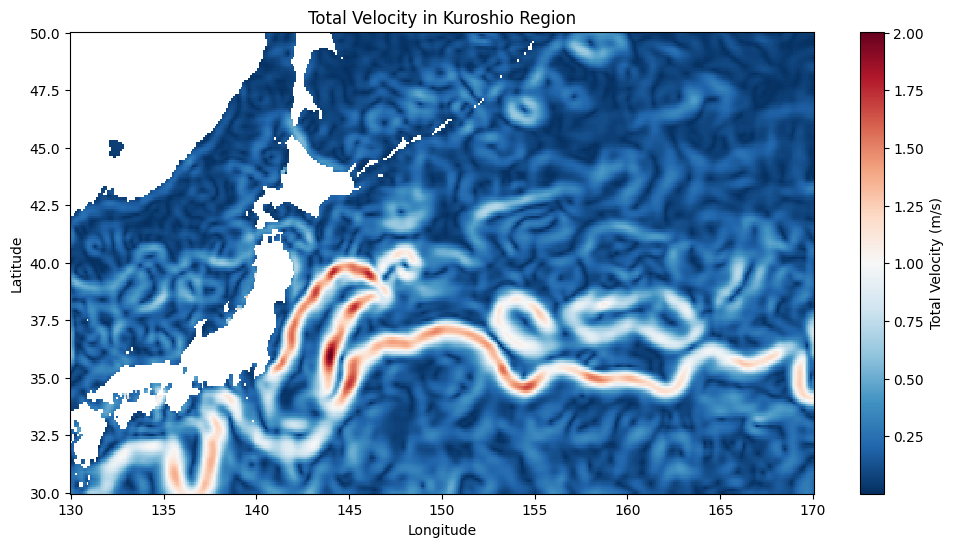

In [9]:
# 计算总速度
total_velocity = np.sqrt(ugos**2 + vgos**2)

# 定义黑潮区域的经纬度边界
lon_min, lon_max = 130, 170  # 东经130°到170°
lat_min, lat_max = 30, 50    # 北纬30°到50°

# 选择黑潮区域的数据
subset_velocity = total_velocity.sel(longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))

# 绘制黑潮区域总速度地图
plt.figure(figsize=(12, 6))
plot = plt.pcolormesh(subset_velocity['longitude'], subset_velocity['latitude'], subset_velocity[0, :, :], cmap='RdBu_r')
cbar = plt.colorbar(plot)
cbar.set_label('Total Velocity (m/s)')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Total Velocity in Kuroshio Region')
plt.show()

In [16]:
subset_sla

<xarray.DataArray 'sla' (latitude: 201, longitude: 401)> Size: 645kB
[80601 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float64 3kB 130.0 130.1 130.2 ... 169.8 169.9 170.0
  * latitude   (latitude) float32 804B 30.0 30.1 30.2 30.3 ... 49.8 49.9 50.0
    time       datetime64[ns] 8B 2023-07-10
Attributes:
    ancillary_variables:  err_sla
    comment:              The sea level anomaly is the sea surface height abo...
    grid_mapping:         crs
    long_name:            Sea level anomaly
    standard_name:        sea_surface_height_above_sea_level
    units:                m

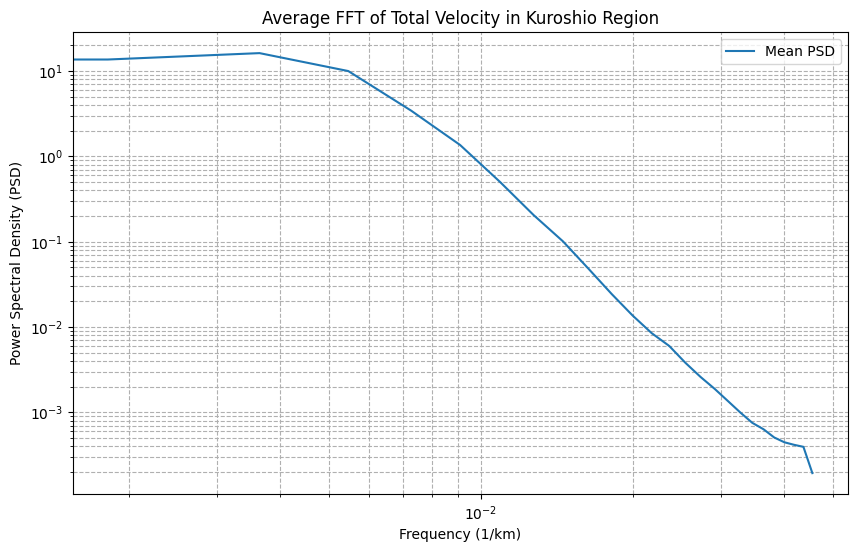

In [27]:
from scipy.signal import welch

# 定义黑潮区域的经纬度边界
lon_min, lon_max = 145, 170  # 东经145°到170°
lat_min, lat_max = 30, 40    # 北纬30°到40°

# 选择黑潮区域的数据（假设有多个时间点）
subset_velocity = total_velocity.sel(longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))

# 检查数据维度
if 'time' in subset_velocity.dims:
    subset_velocity = subset_velocity.isel(time=0)  # 选择第一个时间点的数据

# 沿纬度方向提取一维数据
fft_results = []

# 计算每个经度点的FFT
for lon in subset_velocity['longitude']:
    velocity_profile = subset_velocity.sel(longitude=lon).values.squeeze()  # 去掉长度为1的维度
    if len(velocity_profile) > 1:  # 确保纬度方向上有多个数据点
        nperseg = len(velocity_profile) // 2
        noverlap = nperseg // 2
        freqs, psd = welch(velocity_profile, fs=1/11, window='hann', nperseg=nperseg, noverlap=noverlap)
        fft_results.append(psd)

# 计算平均FFT结果
if fft_results:
    mean_psd = np.mean(fft_results, axis=0)

    # 绘制log-log图
    plt.figure(figsize=(10, 6))
    plt.loglog(freqs, mean_psd, label='Mean PSD')
    plt.xlabel('Frequency (1/km)')
    plt.ylabel('Power Spectral Density (PSD)')
    plt.title('Average FFT of Total Velocity in Kuroshio Region')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()
else:
    print("FFT结果为空，检查数据提取和处理步骤。")


In [28]:
from scipy.optimize import curve_fit

def fit_spectrum_slope(k, y, k_range=(1/300,1/70), ax=None):
    """
    Fit a linear model in the log-log space and plot the fit.

    Parameters:
    -----------
    k: array
        The array of wave number
    y: array
        The array of y
    k_range: tuple
        The range of wave number to be considered for fitting
    ax: axis
        The axis on which the fitted curve should be plotted 

    Returns:
    --------
    slope: float
        The slope of the best fit curve of the form y = a + b*log10(k)
    """
    def func(x, a, b):
        return a + x * b

    msk = (k > k_range[0]) & (k <= k_range[1])
    popt, pcov = curve_fit(func, np.log10(k[msk]), np.log10(y[msk]))
    # 假设 popt[1] 是斜率 n/3，计算 n
    n = popt[1] * 3
    n_rounded = round(n)
    print('Spectrum slope for', k_range, 'is', '{}/3'.format(n_rounded))
    # print('Spectrum slope for', k_range, 'is', popt[1])

    if ax is not None:
        ax.loglog(k[msk], 10**popt[0] * k[msk]**popt[1], '--', color='red', lw=3)
        ax.set_xlabel('Wavenumber (cpkm)')
        ax.set_ylabel('Power Spectral Density (cm$^2$/cpkm)')
        # 获取 k 的最小值
        k_min = np.min(k[msk])

        # 在图表上添加文本
        ax.text(k_min, 10**popt[0] * k_min**popt[1], '{}/3'.format(n_rounded), fontsize=16)
        
    return popt[1]



Spectrum slope for (0.005, 0.1) is -16/3


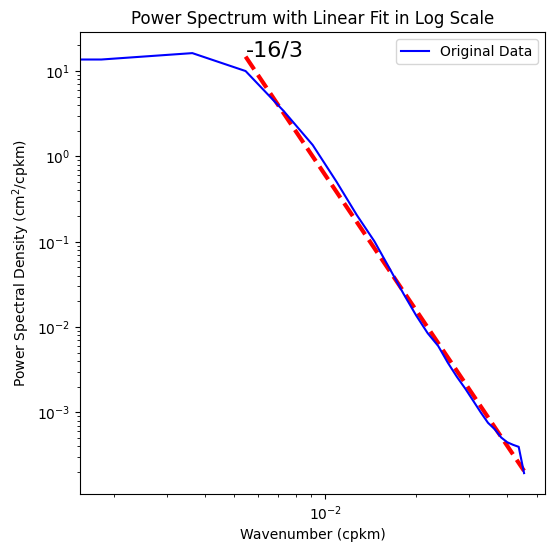

-5.268783265535658

In [29]:
# Plotting setup
fig, ax = plt.subplots(figsize=(6, 6))

# Calling the fit_spectrum_slope function
slope = fit_spectrum_slope(freqs, mean_psd, k_range=(1/200, 1/10), ax=ax)

# Additional plot settings
ax.loglog(freqs, mean_psd, 'b-', label='Original Data')
ax.set_title('Power Spectrum with Linear Fit in Log Scale')
ax.legend()
plt.show()

slope  # Returning the calculated slope


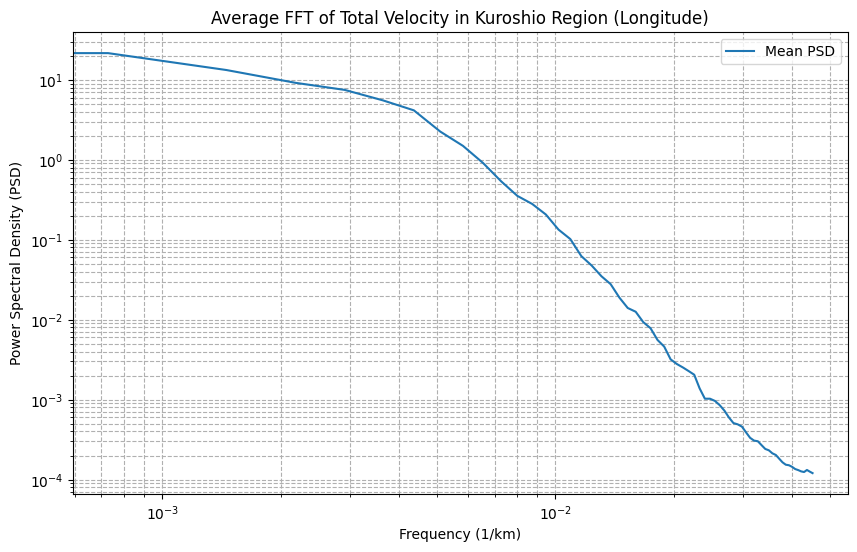

In [30]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# 沿经度方向提取一维数据
fft_results = []

# 计算每个纬度点的FFT
for lat in subset_velocity['latitude']:
    velocity_profile = subset_velocity.sel(latitude=lat).values.squeeze()  # 去掉长度为1的维度
    if len(velocity_profile) > 1:  # 确保经度方向上有多个数据点
        nperseg = len(velocity_profile) // 2
        noverlap = nperseg // 2
        freqs, psd = welch(velocity_profile, fs=1/11, window='hann', nperseg=nperseg, noverlap=noverlap)
        fft_results.append(psd)

# 计算平均FFT结果
if fft_results:
    mean_psd = np.mean(fft_results, axis=0)

    # 绘制log-log图
    plt.figure(figsize=(10, 6))
    plt.loglog(freqs, mean_psd, label='Mean PSD')
    plt.xlabel('Frequency (1/km)')
    plt.ylabel('Power Spectral Density (PSD)')
    plt.title('Average FFT of Total Velocity in Kuroshio Region (Longitude)')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()
else:
    print("FFT结果为空，检查数据提取和处理步骤。")


Spectrum slope for (0.005, 0.1) is -15/3


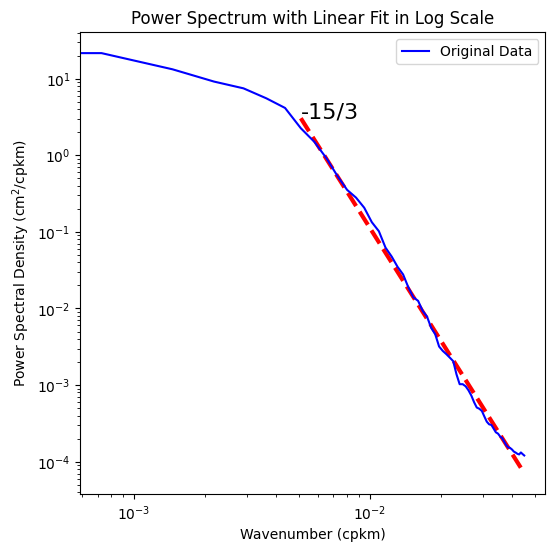

-4.891847349182444

In [31]:
# Plotting setup
fig, ax = plt.subplots(figsize=(6, 6))

# Calling the fit_spectrum_slope function
slope = fit_spectrum_slope(freqs, mean_psd, k_range=(1/200, 1/10), ax=ax)

# Additional plot settings
ax.loglog(freqs, mean_psd, 'b-', label='Original Data')
ax.set_title('Power Spectrum with Linear Fit in Log Scale')
ax.legend()
plt.show()

slope  # Returning the calculated slope


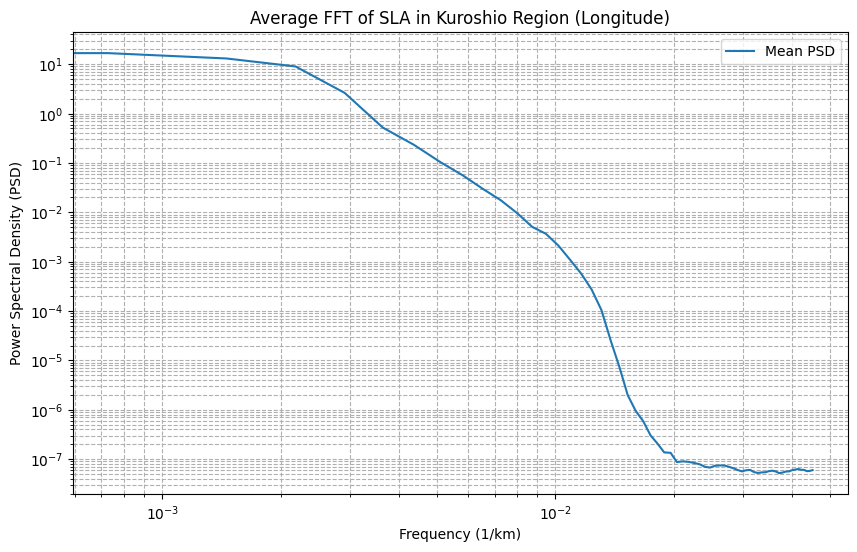

In [32]:
# 提取海面高度异常数据
sla = ds['sla']

# 选择黑潮区域的数据（假设有多个时间点）
subset_sla = sla.sel(longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))

# 检查数据维度
if 'time' in subset_sla.dims:
    subset_sla = subset_sla.isel(time=0)  # 选择第一个时间点的数据

# 沿经度方向提取一维数据
fft_results = []

# 计算每个纬度点的FFT
for lat in subset_sla['latitude']:
    sla_profile = subset_sla.sel(latitude=lat).values.squeeze()  # 去掉长度为1的维度
    if len(sla_profile) > 1:  # 确保经度方向上有多个数据点
        nperseg = len(sla_profile) // 2
        noverlap = nperseg // 2
        freqs, psd = welch(sla_profile, fs=1/11, window='hann', nperseg=nperseg, noverlap=noverlap)
        fft_results.append(psd)

# 计算平均FFT结果
if fft_results:
    mean_psd = np.mean(fft_results, axis=0)

    # 绘制log-log图
    plt.figure(figsize=(10, 6))
    plt.loglog(freqs, mean_psd, label='Mean PSD')
    plt.xlabel('Frequency (1/km)')
    plt.ylabel('Power Spectral Density (PSD)')
    plt.title('Average FFT of SLA in Kuroshio Region (Longitude)')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()
else:
    print("FFT结果为空，检查数据提取和处理步骤。")


Spectrum slope for (0.0025, 0.01) is -16/3


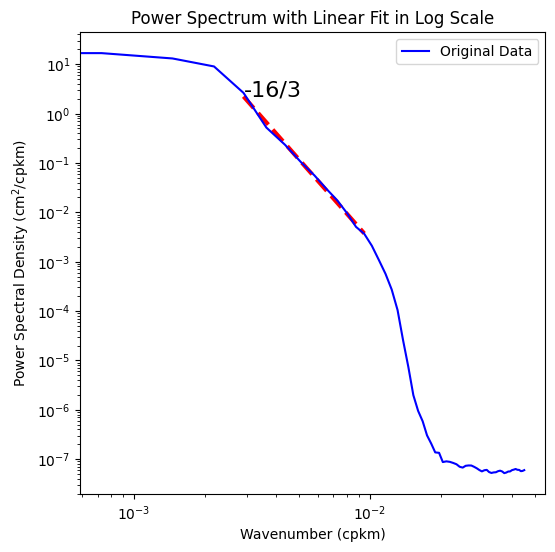

-5.418912837220306

In [33]:
# Plotting setup
fig, ax = plt.subplots(figsize=(6, 6))

# Calling the fit_spectrum_slope function
slope = fit_spectrum_slope(freqs, mean_psd, k_range=(1/400, 1/100), ax=ax)

# Additional plot settings
ax.loglog(freqs, mean_psd, 'b-', label='Original Data')
ax.set_title('Power Spectrum with Linear Fit in Log Scale')
ax.legend()
plt.show()

slope  # Returning the calculated slope


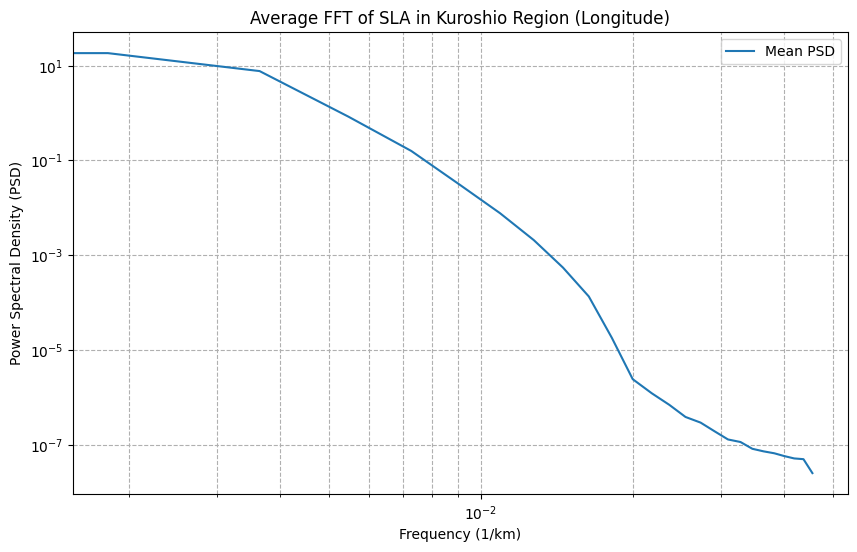

In [34]:
# 提取海面高度异常数据
sla = ds['sla']

# 选择黑潮区域的数据（假设有多个时间点）
subset_sla = sla.sel(longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))

# 检查数据维度
if 'time' in subset_sla.dims:
    subset_sla = subset_sla.isel(time=0)  # 选择第一个时间点的数据

# 沿经度方向提取一维数据
fft_results = []

# 计算每个纬度点的FFT
for lon in subset_sla['longitude']:
    sla_profile = subset_sla.sel(longitude=lon).values.squeeze()  # 去掉长度为1的维度
    if len(sla_profile) > 1:  # 确保经度方向上有多个数据点
        nperseg = len(sla_profile) // 2
        noverlap = nperseg // 2
        freqs, psd = welch(sla_profile, fs=1/11, window='hann', nperseg=nperseg, noverlap=noverlap)
        fft_results.append(psd)

# 计算平均FFT结果
if fft_results:
    mean_psd = np.mean(fft_results, axis=0)

    # 绘制log-log图
    plt.figure(figsize=(10, 6))
    plt.loglog(freqs, mean_psd, label='Mean PSD')
    plt.xlabel('Frequency (1/km)')
    plt.ylabel('Power Spectral Density (PSD)')
    plt.title('Average FFT of SLA in Kuroshio Region (Longitude)')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()
else:
    print("FFT结果为空，检查数据提取和处理步骤。")


Spectrum slope for (0.0025, 0.01) is -18/3


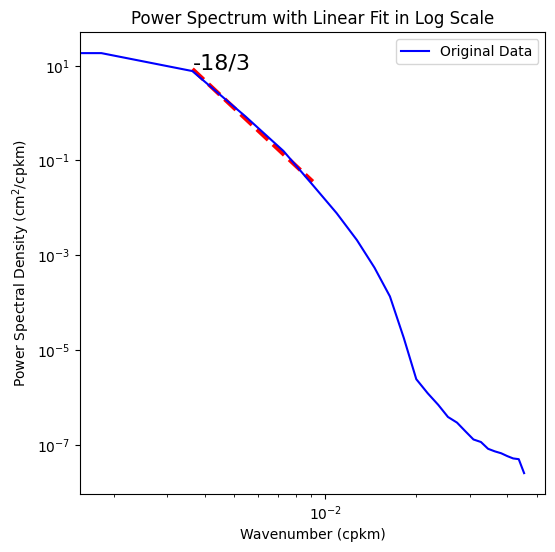

-5.957189467135609

In [35]:
# Plotting setup
fig, ax = plt.subplots(figsize=(6, 6))

# Calling the fit_spectrum_slope function
slope = fit_spectrum_slope(freqs, mean_psd, k_range=(1/400, 1/100), ax=ax)

# Additional plot settings
ax.loglog(freqs, mean_psd, 'b-', label='Original Data')
ax.set_title('Power Spectrum with Linear Fit in Log Scale')
ax.legend()
plt.show()

slope  # Returning the calculated slope
